{'data_root': '/home/data',
 'deepmatch': '/home/deepmatching_1.2.2_c++/deepmatching-static'}


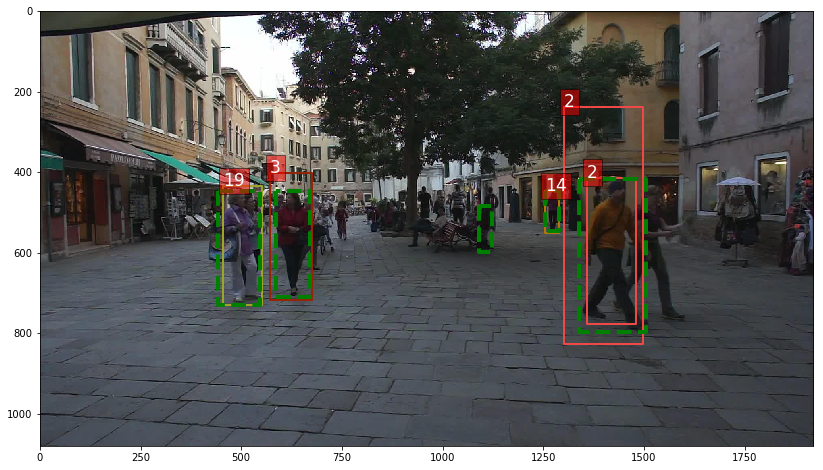

In [1]:
%matplotlib inline
import json
from pppr import aabb
from pprint import pprint
Settings = json.load(open('settings.txt'))
pprint(Settings)
import sys
sys.path.insert(0,'../')
from pak.datasets.MOT import MOT16
from pak import utils
import matplotlib.pyplot as plt
import numpy as np

root = Settings['data_root']

from experiments import MOT16_Experiments

mot16 = MOT16_Experiments(root)

fig = plt.figure(figsize=(16,8))

mot16.plot_frame_MOT16_02(fig.add_subplot(111), 1, with_gt=True)


plt.show()

In [3]:
from pak.evaluation import MOTA

Gt = mot16.get_MOT16_02_gt_trajectories()
Hy = mot16.get_MOT16_02_trajectories()
threshold = 300

result = MOTA.evaluate(Gt, Hy, threshold)

print("Result:", result)

Result: 0.71049205936
